## Generate "Mickey" dataset
**Positive class**: sampling circle of radius one (sklearn.datasets.samples_generator.make_circles)  
**Negative class**: uniformly sampling three unit circles at different origins

         x0        x1  y
0  0.579684  0.466873  1
1  0.484992  0.587308  1
2  0.644731  0.585741  1
3  0.392483  0.561805  1
4  0.369550  0.634953  1


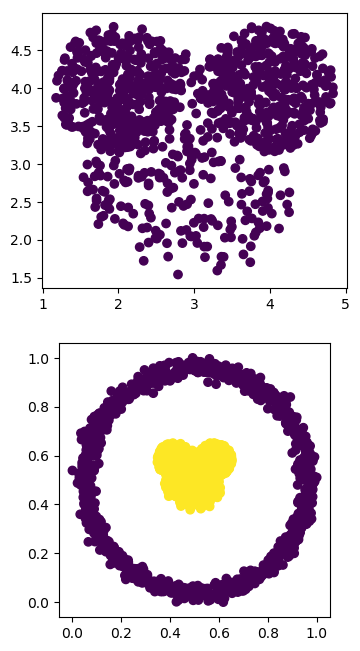

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.preprocessing import MinMaxScaler

def getClass():
    val = np.random.uniform(-1,1)
    val = 1 if val>=0 else -1
    return 1

def getPointCircle(xc=0,yc=0,radius=1):
    length = radius * np.sqrt(np.random.uniform(0, 1))
    angle = np.pi * np.random.uniform(0, 2)
    x = length * np.cos(angle)+xc
    y = length * np.sin(angle)+yc
    return x,y

# Positive class
x1 = []
x2 = []
yl = []
pts = 333
for i in range(0,pts):
    x,y = getPointCircle(3,3,1.5)
    x1.append(x)
    x2.append(y)
    yl.append(1)
    x,y = getPointCircle(2,4,0.85)
    x1.append(x)
    x2.append(y)
    yl.append(1)
    x,y = getPointCircle(4,4,0.85)
    x1.append(x)
    x2.append(y)
    yl.append(1)

np.random.seed(0)
plt.figure(1, figsize=(8, 8), dpi=100)
plt.clf()
plt.subplot(211)
plt.scatter(x1, x2, c=yl)
plt.gca().set_aspect('equal', adjustable='box')

# Put together positive class
Xp = np.column_stack((x1,x2))
yp = np.array(yl)

# Negative class
Xn, yn = make_circles(999, factor=0.999, noise=0.04)
Xn = MinMaxScaler(feature_range=(-3, 9)).fit_transform(Xn)
yn = [0]*999
yn = np.array(yn)

# Put together both classes
X = np.concatenate((Xp,Xn))
y = np.concatenate((yp,yn))

# Scale data
X = MinMaxScaler().fit_transform(X)

plt.subplot(212)
plt.scatter(X[:,0], X[:,1], c=y)
plt.gca().set_aspect('equal', adjustable='box')

# Save to file
df = pd.DataFrame({'x0':X[:,0], 'x1':X[:,1], 'y':y })
df.to_csv('mickey.csv', encoding='utf-8', index=False)
print(df.head())
x0 = dfToList = df['x0'].tolist()
x0 = dfToList = df['x0'].tolist()
x0 = dfToList = df['x0'].tolist()
plt.show()